Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

# Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv',
                             parse_dates=['date_recorded'],
                             na_values=[0, -2.000000e-08]), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')).set_index('id')
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv',
                   parse_dates=['date_recorded'],
                   na_values=[0, -2.000000e-08]).set_index('id')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59399, 40), (14358, 39))

#Wrangle

##Inspect


In [3]:
## Overview of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 59399 entries, 69572.0 to 26348.0
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             17761 non-null  float64       
 1   date_recorded          59399 non-null  datetime64[ns]
 2   funder                 54987 non-null  object        
 3   gps_height             38962 non-null  float64       
 4   installer              54967 non-null  object        
 5   longitude              57587 non-null  float64       
 6   latitude               57587 non-null  float64       
 7   wpt_name               59399 non-null  object        
 8   num_private            757 non-null    float64       
 9   basin                  59399 non-null  object        
 10  subvillage             59028 non-null  object        
 11  region                 59399 non-null  object        
 12  region_code            59399 non-null  int64      

In [4]:
## Look closer at numeric columns for feature engineering and outliers
train.select_dtypes(['int', 'float'])

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
69572.0,6000.0,1390.0,34.938093,-9.856322,NaN,11,5.0,109.0,1999.0
8776.0,NaN,1399.0,34.698766,-2.147466,NaN,20,2.0,280.0,2010.0
34310.0,25.0,686.0,37.460664,-3.821329,NaN,21,4.0,250.0,2009.0
67743.0,NaN,263.0,38.486161,-11.155298,NaN,90,63.0,58.0,1986.0
19728.0,NaN,NaN,31.130847,-1.825359,NaN,18,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
60739.0,10.0,1210.0,37.169807,-3.253847,NaN,3,5.0,125.0,1999.0
27263.0,4700.0,1212.0,35.249991,-9.070629,NaN,11,4.0,56.0,1996.0
37057.0,NaN,NaN,34.017087,-8.750434,NaN,12,7.0,NaN,NaN


In [5]:
## Check for numeric outliers
train['construction_year'].value_counts() ## no apparant outliers
train['gps_height'].describe() ## values less than zero?
train[train['gps_height'] < 0] ## looks legit

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41583.0,NaN,2011-02-23,NaN,-41.0,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,NaN,Rufiji,Kilombero B,Pwani,60,63.0,Mafia,Baleni,100.0,True,GeoData Consultants Ltd,VWC,NaN,False,NaN,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
60983.0,NaN,2013-03-16,NaN,-15.0,NaN,39.527114,-6.988748,Msikitini,NaN,Wami / Ruvu,Madrasa,Dar es Salaam,7,3.0,Temeke,Kimbiji,50.0,True,GeoData Consultants Ltd,VWC,NaN,False,1970.0,mono,mono,motorpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other,non functional
68908.0,NaN,2011-03-05,NaN,-21.0,NaN,39.670943,-7.906606,Royal,NaN,Rufiji,Kigamboni,Pwani,60,60.0,Mafia,Kilindoni,32.0,True,GeoData Consultants Ltd,VWC,NaN,False,NaN,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
2136.0,NaN,2011-02-22,NaN,-16.0,NaN,39.854320,-7.783063,Mvivini,NaN,Rufiji,Jimbo Mjini,Pwani,60,63.0,Mafia,Kirongwe,230.0,True,GeoData Consultants Ltd,VWC,NaN,False,NaN,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
35193.0,NaN,2011-03-16,Amref,-19.0,AMREF,39.244178,-7.368293,Kwa,NaN,Rufiji,Kimogola,Pwani,6,4.0,Mkuranga,Magawa,500.0,True,GeoData Consultants Ltd,VWC,NaN,False,2007.0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20017.0,NaN,2013-02-08,Amref,-3.0,Amref,40.160806,-10.578354,Kwa Rashid Haya,NaN,Ruvuma / Southern Coast,Misri,Mtwara,99,1.0,Mtwara Rural,Chawi,250.0,True,GeoData Consultants Ltd,VWC,Ngonja water supply,True,2012.0,mono,mono,motorpump,vwc,user-group,unknown,unknown,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
3396.0,50.0,2013-03-16,NaN,-20.0,NaN,39.524021,-6.984802,Kwa Mariwala,NaN,Wami / Ruvu,Miembe Dekwa,Dar es Salaam,7,3.0,Temeke,Kimbiji,210.0,True,GeoData Consultants Ltd,VWC,NaN,False,2010.0,nira/tanira,nira/tanira,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
65997.0,NaN,2013-01-24,Serikali,-37.0,Serikali,39.736299,-9.884813,Kwa Asha Mgugi,NaN,Ruvuma / Southern Coast,Mbanja B,Lindi,80,62.0,Lindi Rural,Mbanja,300.0,True,GeoData Consultants Ltd,NaN,NaN,True,1981.0,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional


In [6]:
## Sum all null values
train.isnull().sum().sort_values() ## Simple Imputer

status_group                 0
payment                      0
management_group             0
management                   0
extraction_type_class        0
extraction_type_group        0
extraction_type              0
quality_group                0
quantity                     0
waterpoint_type_group        0
recorded_by                  0
quantity_group               0
payment_type                 0
lga                          0
ward                         0
region_code                  0
region                       0
basin                        0
source                       0
wpt_name                     0
source_type                  0
source_class                 0
waterpoint_type              0
date_recorded                0
water_quality                0
district_code               23
subvillage                 371
latitude                  1812
longitude                 1812
permit                    3056
public_meeting            3333
scheme_management         3877
funder  

In [7]:
## Further inspect nulls
train['num_private'].value_counts() ## can be imputed
train['amount_tsh'].value_counts() ## can be imputed
train['subvillage'].value_counts() ## can be imputed after encoded
train['funder'].value_counts() ## can be imputed after encoded

Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
                                ... 
Hasnan Murig (mbunge)              1
Rajab Seleman                      1
Kitiangare Village Community       1
Government/school                  1
Raramataki                         1
Name: funder, Length: 1896, dtype: int64

In [8]:
## Check for any duplicate columns
train.head(10).T.duplicated() ## quality_group and extraction_type_group

amount_tsh               False
date_recorded            False
funder                   False
gps_height               False
installer                False
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage               False
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting           False
recorded_by              False
scheme_management        False
scheme_name              False
permit                   False
construction_year        False
extraction_type          False
extraction_type_group     True
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_group            False
quantity

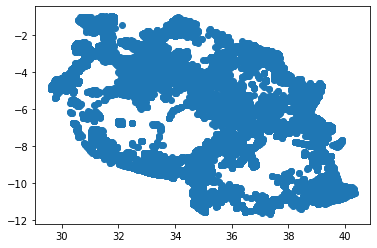

In [9]:
## Check for any location outliers
import matplotlib.pyplot as plt

plt.scatter(train['longitude'], train['latitude']); ## Replaced in read_csv

In [10]:
## Check for high cardinality columns; recorded_by only contains one value
train.select_dtypes('object').nunique().sort_values() ## Ordinal Encoder

recorded_by                  1
permit                       2
public_meeting               2
status_group                 3
source_class                 3
quantity_group               5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
source_type                  7
payment                      7
waterpoint_type              7
extraction_type_class        7
payment_type                 7
water_quality                8
basin                        9
source                      10
scheme_management           12
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
funder                    1896
ward                      2092
installer                 2144
scheme_name               2696
subvillage               19287
wpt_name                 37400
dtype: int64

##Wrangle Function

In [11]:
def wrangle(X):

  #Make a copy
  X = X.copy()

  #Create yr_recorded column
  X['yr_recorded'] = X['date_recorded'].dt.year

  ## Feature Engineering
  X['pump_age'] = X['yr_recorded'] - X['construction_year']
  X['tsh_per_person'] = X['amount_tsh'] / X['population']
  X['tsh_by_height'] = X['amount_tsh'] / X['gps_height']

  #Column list to remove
  columns=['date_recorded', 'recorded_by', 'quality_group', 'extraction_type_group']
  X = X.drop(columns=columns)

  return X

In [12]:
train = wrangle(train)
X_test = wrangle(test)

#Split

In [13]:
## Split data into target variable and feature matrix
target = 'status_group'
y = train[target]
X = train.drop(columns=target)

## Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
## Check that data has been properly split
assert len(X_train) + len(X_val) == len(train)

#Baseline

In [15]:
print('Baseline Accuracy:', y.value_counts(normalize=True).max())

Baseline Accuracy: 0.5430899510092763


#Build Model

In [16]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
## Logistic Regression
logreg = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

logreg.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
## Decision Tree
dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()
)

dt.fit(X_train, y_train);

In [19]:
dt.named_steps['decisiontreeclassifier'].tree_.max_depth

42

In [58]:
## Random Forest
rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

rf.fit(X_train, y_train);

#Check Metrics

In [59]:
## Default model results
models = [logreg, dt, rf]

for model in models:
  print(model.steps[-1][0])
  print('Training Accuracy:', model.score(X_train, y_train))
  print('Validation Accuracy:', model.score(X_val, y_val), '\n')

logisticregression
Training Accuracy: 0.6484353626970265
Validation Accuracy: 0.6495791245791246 

decisiontreeclassifier
Training Accuracy: 0.9999789557861066
Validation Accuracy: 0.6941077441077441 

randomforestclassifier
Training Accuracy: 0.9999579115722133
Validation Accuracy: 0.8091750841750842 



#Tune Models

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
## Grid Search best params for dt
dt_param_grid = {
    'decisiontreeclassifier__max_depth': [5, 10, 20, 30 , 40],
    'decisiontreeclassifier__max_features': list(range(5, 40, 5))
}

dt_gs = GridSearchCV(dt, param_grid=dt_param_grid)

In [25]:
dt_gs.fit(X_train, y_train)
print(dt_gs.best_params_) ## 20, 10

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: Future

{'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__max_features': 15}


In [60]:
## Grid Search best params for rf
rf_param_grid = {
    'randomforestclassifier__n_estimators': [60, 70, 80, 90, 100],
    'randomforestclassifier__max_depth': [5, 10, 20, 30, 40]
}

rf_gs = GridSearchCV(rf, param_grid=rf_param_grid)

In [61]:
rf_gs.fit(X_train, y_train);
print(rf_gs.best_params_); ## 20 depth, 100 estimators

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: Future

{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 100}


##Tuned Models

In [28]:
dt_tuned = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=20, max_features=10)
)

dt_tuned.fit(X_train, y_train);

In [80]:
rf_tuned = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, max_depth=23, random_state=42)
)

rf_tuned.fit(X_train, y_train);

##Check Metrics


In [81]:
models_tuned = [dt_tuned, rf_tuned]

for model in models_tuned:
  print(model.steps[-1][0])
  print('Training Accuracy:', model.score(X_train, y_train))
  print('Validation Accuracy:', model.score(X_val, y_val), '\n')

decisiontreeclassifier
Training Accuracy: 0.9408026263178939
Validation Accuracy: 0.7426767676767677 

randomforestclassifier
Training Accuracy: 0.9864264820387635
Validation Accuracy: 0.814057239057239 



#Create Submission

In [32]:
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [82]:
y_pred = rf_tuned.predict(X_test)

submission = pd.DataFrame({'id': X_test.index, 'status_group': y_pred})
submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [83]:
time = pd.Timestamp.now().strftime('%Y-%m-%d-%H-%M_')
submission.to_csv(f'{time}rf_submission.csv', index=False)